In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 📊 Lab 5: Visualizing Principal Component Analysis (PCA) – Heart Disease Dataset

## 🧾 Dataset Introduction

For this lab, we utilize the **Heart Disease dataset** from Kaggle.

It contains 1025 samples with 13 clinical features (e.g., age, cholesterol, thalach) describing patients, along with a target label indicating the presence or absence of heart disease.

PCA is particularly useful for this dataset because it enables the reduction of 13 dimensions down to 2 or 3 for visualization, while retaining most of the original variability in the data.  
The dataset is balanced and contains numerical features only.

### Why PCA for the Heart Disease Dataset?

- **High Dimensionality:** With 13 features, visualizing and understanding relationships is challenging. PCA projects the data into fewer dimensions that capture the most variance.
- **Class Structure:** The dataset contains two classes (presence or absence of heart disease). PCA helps reveal whether these classes are separable in lower-dimensional space.
- **Feature Redundancy:** Some clinical features are correlated. PCA identifies and combines these into principal components, reducing redundancy.
- **Interpretability:** By examining the principal components and their loadings (see the Eigenvectors table), we can understand which original features contribute most to the main axes of variation in the data.

### What You Will Learn

- How to standardize data for PCA.
- How to compute and interpret the covariance matrix.
- How to extract and visualize eigenvalues and eigenvectors.
- How to decide how many principal components to keep.
- How to visualize high-dimensional data in 2D using PCA, and interpret the results in the context of the heart disease dataset.


In [117]:
# Import necessary modules for PCA workflow
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set global font to Times New Roman for all plots
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14

csv_filename = "heart.csv" # downloaded from 'https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset'
df = pd.read_csv(csv_filename)

# Assign the target labels from the dataset
target = df["target"]

# Display the first 5 rows of the dataframe
df.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


Before applying PCA, the data is standardized using **StandardScaler**. 

This step ensures that all features have zero mean and unit variance, preventing any single feature from dominating due to its scale.

In [118]:
# Standardize the features to zero mean and unit variance (excluding the target column)
features = df.drop(columns=["target"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Convert the scaled features back into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=features.columns)

# Display the scaled data
print("Standardized Features:")
print(X_scaled_df.head(5))

Standardized Features:
        age       sex        cp  trestbps      chol       fbs   restecg  \
0 -0.268437  0.661504 -0.915755 -0.377636 -0.659332 -0.418878  0.891255   
1 -0.158157  0.661504 -0.915755  0.479107 -0.833861  2.387330 -1.004049   
2  1.716595  0.661504 -0.915755  0.764688 -1.396233 -0.418878  0.891255   
3  0.724079  0.661504 -0.915755  0.936037 -0.833861 -0.418878  0.891255   
4  0.834359 -1.511706 -0.915755  0.364875  0.930822  2.387330  0.891255   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.821321 -0.712287 -0.060888  0.995433  1.209221  1.089852  
1  0.255968  1.403928  1.727137 -2.243675 -0.731971  1.089852  
2 -1.048692  1.403928  1.301417 -2.243675 -0.731971  1.089852  
3  0.516900 -0.712287 -0.912329  0.995433  0.238625  1.089852  
4 -1.874977 -0.712287  0.705408 -0.624121  2.179817 -0.522122  


## Compute Covarience Matrix

In [119]:
cov_matrix = np.cov(X_scaled.T)  # Transpose to get features as rows
print("Covariance Matrix:")
print(pd.DataFrame(cov_matrix, index=features.columns, columns=features.columns))

Covariance Matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000977 -0.103341 -0.072037  0.271386  0.220037  0.121362   
sex      -0.103341  1.000977 -0.041159 -0.079051 -0.198451  0.027227   
cp       -0.072037 -0.041159  1.000977  0.038215 -0.081721  0.079371   
trestbps  0.271386 -0.079051  0.038215  1.000977  0.128102  0.181944   
chol      0.220037 -0.198451 -0.081721  0.128102  1.000977  0.026943   
fbs       0.121362  0.027227  0.079371  0.181944  0.026943  1.000977   
restecg  -0.132826 -0.055171  0.043623 -0.123915 -0.147554 -0.104153   
thalach  -0.390608 -0.049413  0.307139 -0.039302 -0.021793 -0.008875   
exang     0.088249  0.139293 -0.401905  0.061257  0.067448  0.049309   
oldpeak   0.208340  0.084769 -0.174904  0.187617  0.064944  0.010870   
slope    -0.169270 -0.026692  0.131761 -0.120563 -0.014262 -0.061963   
ca        0.271816  0.111838 -0.176379  0.104656  0.074332  0.137290   
thal      0.072368  0.198618 -0.163501  0.059

## 🔥 Covariance Matrix Heatmap

**What does this image show?**  
- The heatmap visualizes the pairwise covariances between all 13 standardized heart disease features.
- Diagonal cells (values ≈ 1) represent the variance of each feature after standardization.
- Off-diagonal cells show how two features vary together: red for strong positive covariance, blue for strong negative covariance, and white for near-zero (uncorrelated).

**What is its highlight?**  
- *age* and *trestbps* have a moderate positive covariance (0.27), indicating they tend to increase together.
- *thalach* and *exang* show a strong negative covariance (-0.38), meaning as max heart rate increases, exercise-induced angina tends to decrease.
- Features like *chol* and *slope* have near-zero covariance (0.06), suggesting little linear relationship.
- The heatmap reveals clusters of correlated features, highlighting redundancy and the potential for dimensionality reduction.

**What can people learn?**  
- Highly correlated features are redundant and can be combined or reduced using PCA.
- Features with strong negative covariance may represent opposing trends in the data.
- Uncorrelated features provide unique information.
- This visualization justifies the use of PCA: it helps identify which features can be compressed into principal components without significant information loss.


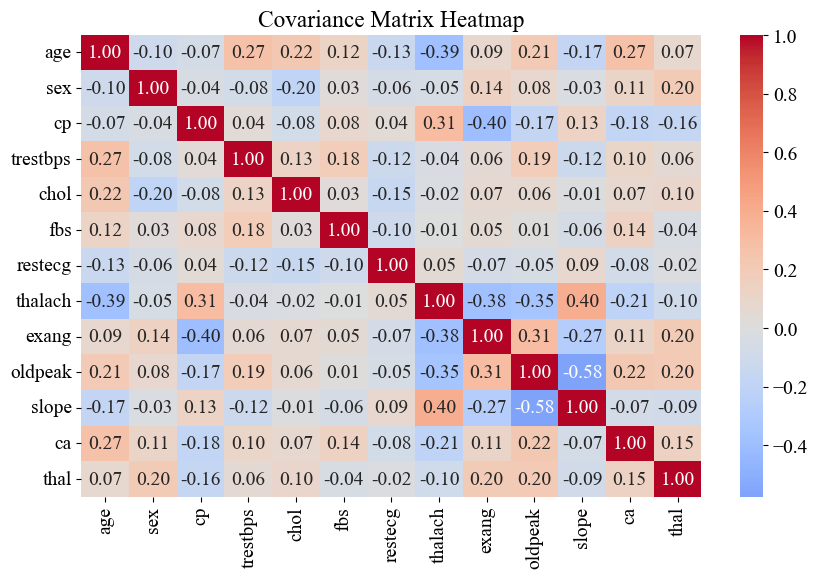

In [120]:
# Visualize the covariance matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    cov_matrix,
    xticklabels=features.columns,
    yticklabels=features.columns,
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt=".2f"
)
plt.title("Covariance Matrix Heatmap")
plt.savefig("images/Lab5_DanielTongu_CovarianceHeatmap.png")
plt.show()

## Eigenvalues of Principal Components


In [121]:
# Compute eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
Eigenvectors = pd.DataFrame(
    eigenvectors,
    index=features.columns,
    columns=[f'PC{i+1}' for i in range(eigenvectors.shape[1])]
)
print(Eigenvectors)

Eigenvalues:
[2.7808016  1.55787454 1.20216278 1.17036695 1.00014601 0.97329354
 0.87728796 0.76873509 0.7266474  0.63107452 0.52276598 0.43207609
 0.36946285]

Eigenvectors:
               PC1       PC2       PC3       PC4       PC5       PC6  \
age       0.309574  0.398286  0.070616  0.053975 -0.290981 -0.204218   
sex       0.078073 -0.379076 -0.618113  0.006604  0.049592  0.015825   
cp       -0.285616  0.274947 -0.198286 -0.403411  0.188481 -0.228271   
trestbps  0.178760  0.438909 -0.154674 -0.128736  0.241707 -0.139863   
chol      0.127985  0.369819  0.251021  0.468203  0.305881 -0.005674   
fbs       0.080713  0.321476 -0.447107 -0.176946 -0.233021  0.280946   
restecg  -0.129490 -0.244760  0.238472 -0.179450 -0.274561 -0.632247   
thalach  -0.416970  0.093830 -0.197128  0.096199  0.333954 -0.056088   
exang     0.363869 -0.258613  0.050942  0.129796  0.017338  0.310502   
oldpeak   0.421781 -0.070527  0.044178 -0.322653  0.260365 -0.165167   
slope    -0.380108  0.064792 -0.1

----------------------------------------------

### 📉 Plot Eigenvalues of Principal Components

**What does this image show?**  
- The bar chart displays the eigenvalues for each principal component (PC) derived from the covariance matrix of the standardized heart disease dataset.
- Each bar's height corresponds to the amount of variance captured by that PC. For this dataset, PC1 has the highest eigenvalue (~2.78), followed by PC2 (~1.56), and so on.

**What is its highlight?**  
- The first principal component (PC1) alone explains a substantial portion of the total variance, with PC2 also contributing significantly.
- Specifically, PC1 and PC2 together account for a large share of the total variance in the dataset.
- After PC5, the eigenvalues drop below 1, indicating that each subsequent component explains less variance than any single original feature.
- The last few PCs (PC11–PC13) contribute very little additional information, as seen by their small bars.

**What can people learn?**  
- This plot helps determine how many principal components to retain for effective dimensionality reduction.
- In this case, keeping the first 3–5 PCs would preserve most of the dataset's information, while reducing noise and complexity.
- The sharp decline in eigenvalues after the first few PCs visually justifies focusing on those components for further analysis or visualization.

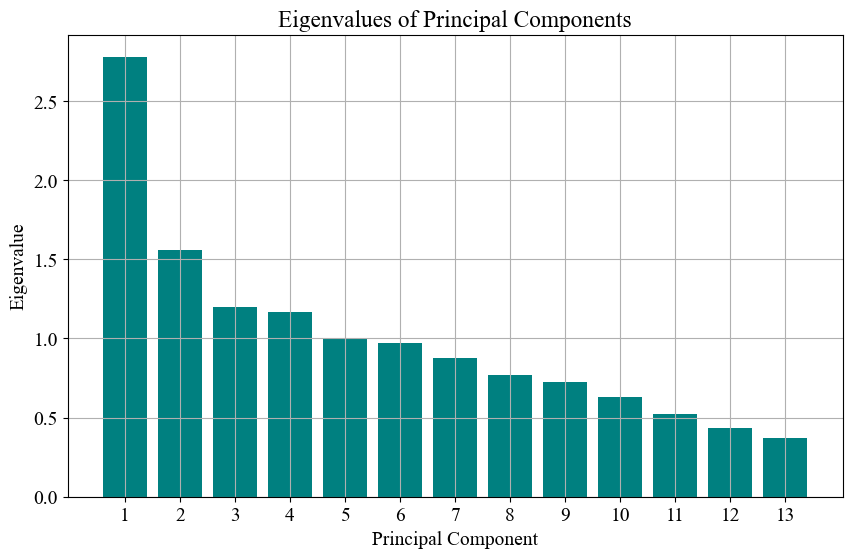

In [122]:
# Plot eigenvalues in a scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, color='teal')
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues of Principal Components")
plt.xticks(range(1, len(eigenvalues) + 1))
plt.grid(True)
plt.savefig("images/Lab5_DanielTongu_EigenvaluesBarChart.png")
plt.show()

## 📈 Scree Plot – Cumulative Variance Explained

**What does this image show?**  
- The scree plot displays the cumulative proportion of variance explained as more principal components are added.
- The x-axis shows the number of principal components (from 1 to 13), and the y-axis shows the cumulative variance explained (from 0 to 1).

**What is its highlight?**  
- The first principal component explains about **36%** of the total variance.
- The first 2 components together explain about **55%** of the variance.
- The first 3 components capture roughly **67%** of the variance, and the first 5 components together explain over **80%**.
- By the time 7 components are included, more than **89%** of the variance is explained.
- The curve flattens after the first few components, indicating diminishing returns for adding more components.

**What can people learn?**  
- Most of the dataset’s structure can be captured with just the first **3–5 principal components**, making dimensionality reduction highly effective.
- You can reduce the dataset to 3 or 5 dimensions with minimal information loss, simplifying analysis and visualization while retaining the essential patterns in the data.

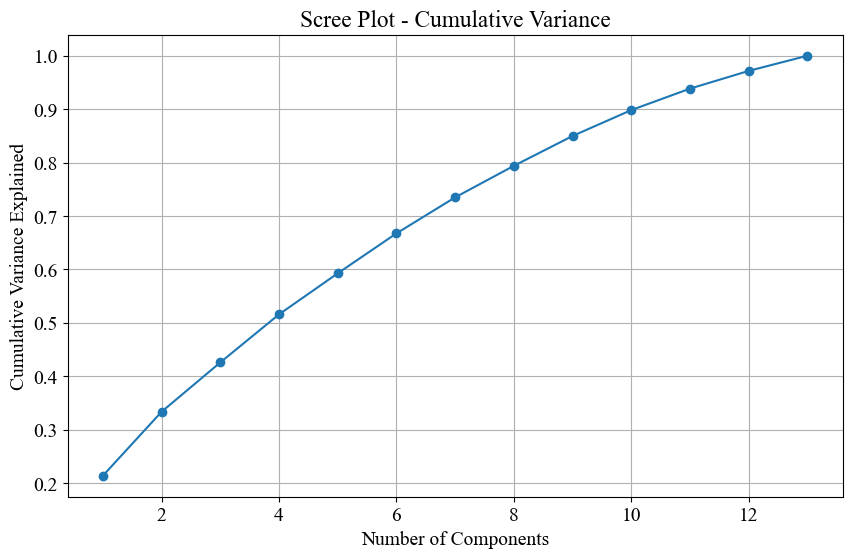

In [123]:
pca = PCA()
pca.fit(X_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Scree Plot - Cumulative Variance")
plt.grid(True)
plt.savefig("images/Lab5_DanielTongu_ScreePlot.png")
plt.show()

## 🌐 PCA 2D Scatterplot

**What does this image show?**  
- This scatterplot projects each heart disease sample onto the first two principal components (PC1 and PC2), with points colored by the target label (presence or absence of heart disease).
- The x-axis (PC1) and y-axis (PC2) together capture about **33% of the total variance** in the dataset.
- Each cluster corresponds to a different target class, revealing how PCA separates the classes in reduced dimensions.

**What is its highlight?**  
- **Target 0** (no heart disease) and **target 1** (heart disease) show visible structure and partial separation.
- The plot demonstrates that even with just two principal components, much of the class structure is preserved:  
    - PC1 is especially effective at separating the two groups.
    - PC2 adds further separation and reveals additional structure.

**What can people learn?**  
- **PCA can reduce 13-dimensional data to 2D while retaining key differences between categories.**
- The separation of classes shows that PCA is effective for visualizing and exploring class structure in high-dimensional datasets.
- Some overlap suggests similarities between groups, but the overall structure is still informative for exploratory analysis and potential classification tasks.


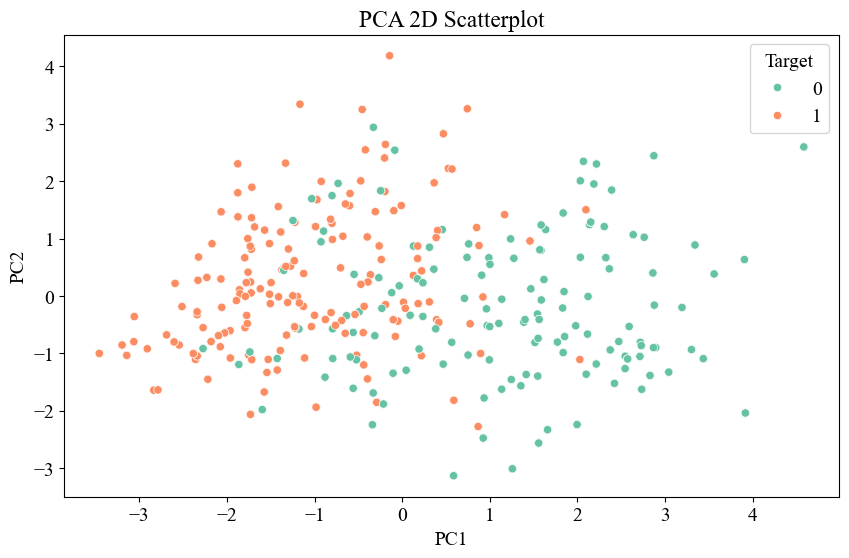

In [127]:
X_pca = pca.transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=target, palette='Set2')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D Scatterplot")
plt.legend(title="Target")
plt.savefig("images/Lab5_DanielTongu_PCA2DScatterplot.png")
plt.show()


## 🧭 PCA Biplot – Feature Vector Overlay

**What does this image show?**  
- The biplot overlays the PCA-transformed heart disease samples (as points) with red arrows representing the original features’ directions and contributions to the first two principal components (PC1 and PC2).
- Each arrow’s direction and length indicate how strongly and in which direction a feature influences the principal components.

**What is its highlight?**  
- Features like **oldpeak** and **exang** have long arrows pointing along the PC1 axis, showing they contribute heavily to PC1 and help separate samples along this dimension.
- **thalach** and **slope** have arrows with strong components in both PC1 and PC2, indicating they influence both axes.
- The plot visually confirms that certain features drive separation between target classes, especially along PC1.

**What can people learn?**  
- Biplots allow you to interpret what each principal component represents in terms of the original features.
- You can see which features are most important for distinguishing between heart disease classes:  
    - For example, samples with high oldpeak and exang are pushed to the right in the plot (high PC1).
    - Features with arrows pointing in similar directions are positively correlated.
- This helps in understanding the underlying structure of the data and guides feature selection or further analysis.

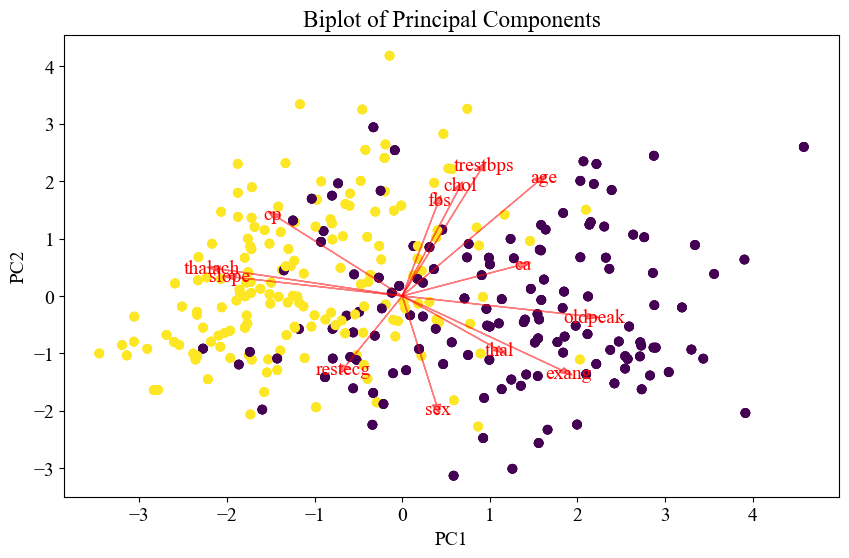

In [128]:
fig, ax = plt.subplots(figsize=(10, 6))
# Scatter plot of the PCA scores
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=target, cmap='viridis')

# Plot arrows for feature loadings, scaled for visibility
for i, feature in enumerate(Eigenvectors.index):
    ax.arrow(0, 0, Eigenvectors.iloc[i, 0]*5, Eigenvectors.iloc[i, 1]*5, color='r', alpha=0.5, head_width=0.1)
    ax.text(Eigenvectors.iloc[i, 0]*5.2, Eigenvectors.iloc[i, 1]*5.2, feature, color='r', ha='center', va='center')

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("Biplot of Principal Components")
plt.savefig("images/Lab5_DanielTongu_Biplot.png")
plt.show()


# 🔺 3D PCA Scatterplot

**What does this image show?**  
A 3D scatterplot of the first three principal components (PC1, PC2, PC3) from the heart disease dataset, with each point representing a patient and colored by the target class (presence or absence of heart disease).

**What is its highlight?**  
This visualization reveals clustering and the spatial distribution of samples in three dimensions, making it easier to observe patterns and separability between classes that may not be visible in 2D.

**What can people learn?**  
3D PCA projections help uncover complex relationships and overlapping clusters, providing deeper insight into the structure of high-dimensional data and the effectiveness of dimensionality reduction for class separation.


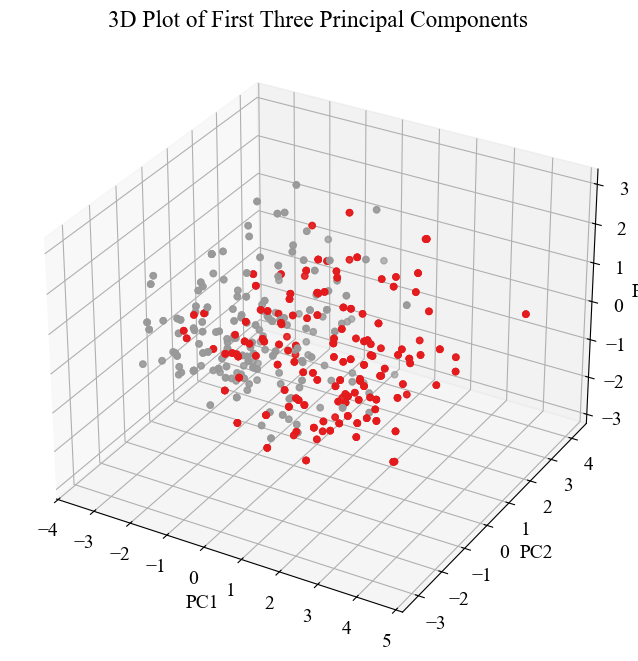

In [137]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=target, cmap='Set1')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Plot of First Three Principal Components')
plt.savefig("images/Lab5_DanielTongu_PCA3DScatterplot.png")
plt.show()

## ✅ Conclusion

This notebook demonstrated the complete PCA workflow:
- **Data standardization** to ensure fair comparison across features.
- **Covariance matrix computation** to reveal relationships between features.
- **Eigen decomposition** to obtain principal components and feature loadings (see the `Eigenvectors` DataFrame).
- **Principal component selection** using eigenvalues and cumulative explained variance.
- **Visualizations** including heatmap, eigenvalue bar chart, scree plot, 2D/3D scatterplots, and biplot for interpretation.

**Key takeaways:**  
- PCA uncovers structure in high-dimensional data, enabling interpretable 2D/3D projections with minimal information loss.
- Most of the dataset’s variance can be captured by the first few principal components, justifying dimensionality reduction.
- This approach is valuable for exploratory analysis and machine learning, simplifying complex datasets while preserving essential patterns.
